In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
import numpy as np
import astropy
import gammapy

print("numpy:", np.__version__)
print("astropy:", astropy.__version__)
print("gammapy:", gammapy.__version__)

numpy: 1.11.3
astropy: 3.0.4
gammapy: 0.8


In [10]:
from gammapy.data import EventList

path = "M82_events_14.fits"
events = EventList.read(path)

In [11]:
type(events)
type(events.table)

astropy.table.table.Table

In [12]:
events.table

EVENT_ID,TIME,RA,DEC,ENERGY,DETX,DETY,MC_ID
,s,deg,deg,TeV,deg,deg,
uint32,float64,float32,float32,float32,float32,float32,int32
1,631108869.19,148.509,69.7774,0.0305021,0.099045,-0.159503,1
2,631108869.191,148.461,69.9476,0.0208156,0.269317,-0.174396,1
3,631108869.192,148.595,69.5692,0.0412567,-0.109402,-0.130824,1
4,631108869.192,149.591,69.9511,0.0221618,0.273219,0.212953,1
5,631108869.208,149.005,69.6113,0.0358709,-0.0676551,0.0122152,1
6,631108869.209,148.726,69.584,0.0414706,-0.0948262,-0.0851704,1
7,631108869.211,149.16,69.7506,0.0271365,0.0717078,0.0658377,1
8,631108869.217,149.283,69.8664,0.0216976,0.18769,0.107666,1


In [13]:
events.time.fits

array(['2020-01-01T00:01:09.190(TT)', '2020-01-01T00:01:09.191(TT)',
       '2020-01-01T00:01:09.192(TT)', ..., '2020-01-01T01:01:08.855(TT)',
       '2020-01-01T01:01:09.176(TT)', '2020-01-01T01:01:09.181(TT)'], 
      dtype='<U27')

<SkyCoord (Galactic): (l, b) in deg
    ( 141.40980734,  40.56780667)>

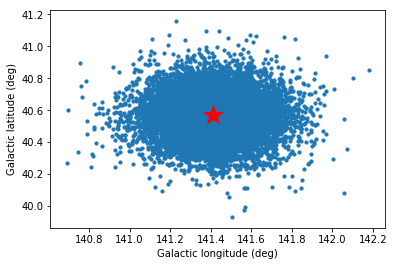

In [14]:
# Event positions
pos = events.galactic[::100]  # sub-sample every 100th event
plt.scatter(pos.l.wrap_at("180 deg").deg, pos.b.deg, s=10)
# Pointing position
pos_pnt = events.pointing_radec.galactic
plt.scatter(
    pos_pnt.l.wrap_at("180 deg").deg, pos_pnt.b.deg, marker="*", s=400, c="red"
)
plt.xlabel("Galactic longitude (deg)")
plt.ylabel("Galactic latitude (deg)")
pos_pnt

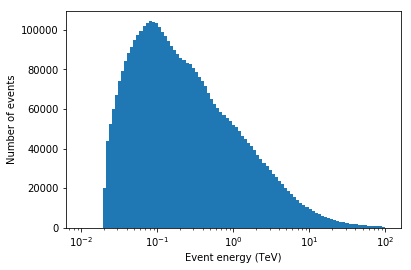

In [15]:
energy = events.table["ENERGY"].data
energy_bins = np.logspace(-2, 2, num=100)
plt.hist(energy, bins=energy_bins)
plt.semilogx()
plt.xlabel("Event energy (TeV)")
plt.ylabel("Number of events");

In [16]:
is_gamma = events.table["MC_ID"] != 1
print("Number of events: ", len(events.table))
print("Number of gammas: ", is_gamma.sum())
print("Number of hadrons: ", len(events.table) - is_gamma.sum())

Number of events:  4166221
Number of gammas:  0
Number of hadrons:  4166221


[  3.05021312e-02   2.08155531e-02   4.12566662e-02 ...,   6.72097778e+01
   6.56380081e+01   4.47732048e+01]


AttributeError: Unknown property density

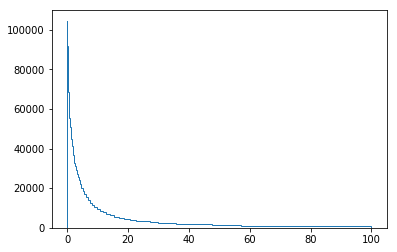

In [26]:
energy = events.table["ENERGY"].data
energy_bins = np.logspace(-2, 2, num=100)
opts = dict(bins=energy_bins, density=True, histtype="step")
print(energy[~is_gamma])
plt.hist(energy[~is_gamma], label="hadron", **opts)
#plt.hist(energy[is_gamma], label="gamma", **opts)
plt.loglog()
plt.xlabel("Event energy (TeV)")
plt.ylabel("Number of events")
plt.legend();

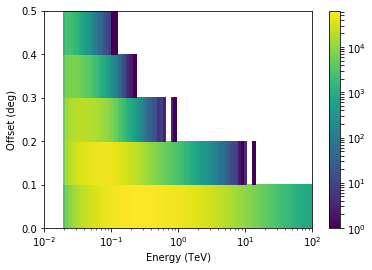

In [22]:

energy_bins = 10 ** np.linspace(-2, 2, 100)
offset_bins = np.arange(0, 0.6, 0.1)

t = events.table
offset = np.sqrt(t["DETX"] ** 2 + t["DETY"] ** 2)
hist = np.histogram2d(
    x=t["ENERGY"], y=offset, bins=(energy_bins, offset_bins)
)[0].T

from matplotlib.colors import LogNorm

plt.pcolormesh(energy_bins, offset_bins, hist, norm=LogNorm())
plt.semilogx()
plt.colorbar()
plt.xlabel("Energy (TeV)")
plt.ylabel("Offset (deg)")

ValueError: setting an array element with a sequence.

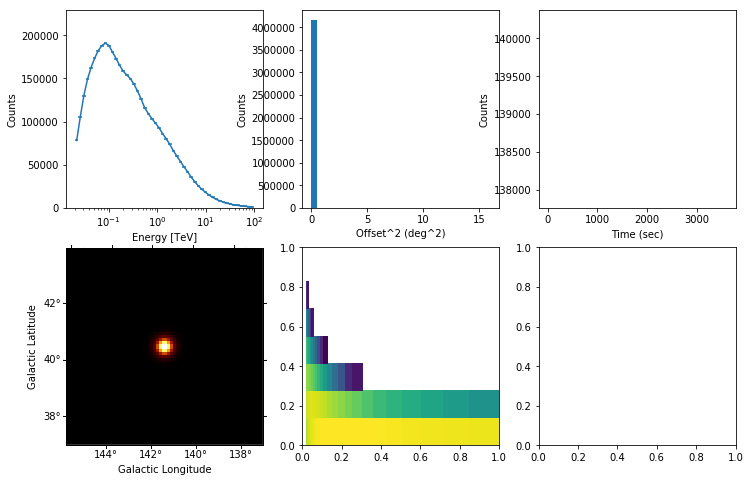

In [23]:
events.peek()